In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\gamezone_orders_data_cleaned.csv"
df = pd.read_csv(
    file_path,
    parse_dates=['purchase_ts_cleaned', 'ship_ts'],
    dtype={
        'purchase_year': 'Int64',
        'purchase_month': 'Int64',
        'time_to_ship': 'Int64',
        'revenue': 'float'
    },
    encoding='utf-8',
    keep_default_na=False,
    na_values=['']  # Only treat empty strings as NaN
)

In [2]:
region_performance = (
    df.groupby('region')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_orders=('order_id', 'nunique'),
        unique_customers=('user_id', 'nunique')
    )
    .reset_index()
)

region_performance

,region,total_revenue,total_orders,unique_customers
0,APAC,531226.11,1570,1430
1,EMEA,2562575.68,9454,8640
2,LATAM,85841.40,386,356
3,NA,2968096.26,10265,9388
4,unknown,3527.04,42,37


In [5]:
region_performance.to_csv('region _performance.csv', index=False)

In [3]:


# --- COUNTRY-LEVEL PERFORMANCE ---
country_perf = (
    df.groupby('country_code')
    .agg(total_revenue=('revenue', 'sum'))
    .reset_index()
    .sort_values('total_revenue', ascending=False)
)

# Total revenue
total_rev = country_perf['total_revenue'].sum()

# Top 5 countries
top5_countries = country_perf.head(5)
top5_share = (top5_countries['total_revenue'].sum() / total_rev) * 100

# US vs International
us_rev = country_perf.loc[country_perf['country_code'] == 'US', 'total_revenue'].sum()
us_share = (us_rev / total_rev) * 100
intl_share = 100 - us_share

# --- REGION-LEVEL PERFORMANCE ---
region_perf = (
    df.groupby('region')
    .agg(total_revenue=('revenue', 'sum'))
    .reset_index()
    .sort_values('total_revenue', ascending=False)
)

# Region shares
top_regions = region_perf.head(2)
top_regions_share = (top_regions['total_revenue'].sum() / total_rev) * 100


# --- 📊 LOG INSIGHTS OUTPUT ---
print("🌍 COUNTRY-LEVEL INSIGHT (LOG #2)")
print(f"Top 5 countries: {', '.join(top5_countries['country_code'].head(5))}")
print(f"Top 5 countries = {top5_share:.2f}% of total revenue.")
print(f"US contributes {us_share:.2f}% | International = {intl_share:.2f}%\n")
print("Metric: Geographic concentration")
print("Dimension: Country")
print(f"Observation: Top 5 countries = {top5_share:.2f}% of total revenue; US alone = {us_share:.2f}%")
print("Stakeholder: CEO (for expansion strategy)")
print("Priority: MEDIUM")
print("Action: Explore growth in mid-tier markets, reduce over-dependence on top performers.\n")

print("🌎 REGION-LEVEL INSIGHT (LOG #3)")
print(f"Top 2 regions: {', '.join(top_regions['region'].head(2))}")
print(f"Top 2 regions = {top_regions_share:.2f}% of total revenue.\n")
print("Metric: Revenue distribution by region")
print("Dimension: Region")
print(f"Observation: Top 2 regions ({', '.join(top_regions['region'].head(2))}) = {top_regions_share:.2f}% of total revenue.")
print("Stakeholder: CEO, Regional Sales Head")
print("Priority: MEDIUM")
print("Action: Strengthen marketing in emerging regions; analyze barriers in low-revenue areas.")


🌍 COUNTRY-LEVEL INSIGHT (LOG #2)
Top 5 countries: US, GB, DE, CA, JP
Top 5 countries = 67.33% of total revenue.
US contributes 48.05% | International = 51.95%

Metric: Geographic concentration
Dimension: Country
Observation: Top 5 countries = 67.33% of total revenue; US alone = 48.05%
Stakeholder: CEO (for expansion strategy)
Priority: MEDIUM
Action: Explore growth in mid-tier markets, reduce over-dependence on top performers.

🌎 REGION-LEVEL INSIGHT (LOG #3)
Top 2 regions: NA, EMEA
Top 2 regions = 89.91% of total revenue.

Metric: Revenue distribution by region
Dimension: Region
Observation: Top 2 regions (NA, EMEA) = 89.91% of total revenue.
Stakeholder: CEO, Regional Sales Head
Priority: MEDIUM
Action: Strengthen marketing in emerging regions; analyze barriers in low-revenue areas.


In [10]:
country_perf

,country_code,total_revenue
142,US,2955813.22
46,GB,475395.19
34,DE,255805.41
24,CA,233775.22
69,JP,220627.68
...,...,...
9,AW,49.98
5,AP,48.00
17,BH,24.00
86,ME,23.18


In [7]:
region_perf

,region,total_revenue
3,NA,2968096.26
1,EMEA,2562575.68
0,APAC,531226.11
2,LATAM,85841.40
4,unknown,3527.04


In [5]:
# --- COUNTRY-LEVEL PERFORMANCE ---
country_perf = (
    df.groupby('country_code')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_orders=('order_id', 'nunique'),
        unique_customers=('user_id', 'nunique')
    )
    .reset_index()
    .sort_values('total_revenue', ascending=False)
)

# Add EDA-style metrics
country_perf['revenue_per_order'] = country_perf['total_revenue'] / country_perf['total_orders']
country_perf['revenue_per_customer'] = country_perf['total_revenue'] / country_perf['unique_customers']
country_perf['order_per_customer'] = country_perf['total_orders'] / country_perf['unique_customers']
country_perf['revenue_%'] = (country_perf['total_revenue'] / country_perf['total_revenue'].sum()) * 100
country_perf['cumulative_revenue_%'] = country_perf['total_revenue'].cumsum() / country_perf['total_revenue'].sum() * 100

# Total revenue
total_rev = country_perf['total_revenue'].sum()

# Top 5 countries
top5_countries = country_perf.head(5)
top5_share = (top5_countries['total_revenue'].sum() / total_rev) * 100

# US vs International
us_rev = country_perf.loc[country_perf['country_code'] == 'US', 'total_revenue'].sum()
us_share = (us_rev / total_rev) * 100
intl_share = 100 - us_share


# --- REGION-LEVEL PERFORMANCE ---
region_perf = (
    df.groupby('region')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_orders=('order_id', 'nunique'),
        unique_customers=('user_id', 'nunique')
    )
    .reset_index()
    .sort_values('total_revenue', ascending=False)
)

# Add same metrics
region_perf['revenue_per_order'] = region_perf['total_revenue'] / region_perf['total_orders']
region_perf['revenue_per_customer'] = region_perf['total_revenue'] / region_perf['unique_customers']
region_perf['order_per_customer'] = region_perf['total_orders'] / region_perf['unique_customers']
region_perf['revenue_%'] = (region_perf['total_revenue'] / region_perf['total_revenue'].sum()) * 100
region_perf['cumulative_revenue_%'] = region_perf['total_revenue'].cumsum() / region_perf['total_revenue'].sum() * 100

# Region shares
top_regions = region_perf.head(2)
top_regions_share = (top_regions['total_revenue'].sum() / total_rev) * 100


# --- 📊 LOG INSIGHTS OUTPUT ---
print("🌍 COUNTRY-LEVEL INSIGHT (LOG #2)")
print(f"Top 5 countries: {', '.join(top5_countries['country_code'].head(5))}")
print(f"Top 5 countries = {top5_share:.2f}% of total revenue.")
print(f"US contributes {us_share:.2f}% | International = {intl_share:.2f}%\n")
print("Metric: Geographic concentration")
print("Dimension: Country")
print(f"Observation: Top 5 countries = {top5_share:.2f}% of total revenue; US alone = {us_share:.2f}%")
print("Stakeholder: CEO (for expansion strategy)")
print("Priority: MEDIUM")
print("Action: Explore growth in mid-tier markets, reduce over-dependence on top performers.\n")

print("🌎 REGION-LEVEL INSIGHT (LOG #3)")
print(f"Top 2 regions: {', '.join(top_regions['region'].head(2))}")
print(f"Top 2 regions = {top_regions_share:.2f}% of total revenue.\n")
print("Metric: Revenue distribution by region")
print("Dimension: Region")
print(f"Observation: Top 2 regions ({', '.join(top_regions['region'].head(2))}) = {top_regions_share:.2f}% of total revenue.")
print("Stakeholder: CEO, Regional Sales Head")
print("Priority: MEDIUM")
print("Action: Strengthen marketing in emerging regions; analyze barriers in low-revenue areas.")


🌍 COUNTRY-LEVEL INSIGHT (LOG #2)
Top 5 countries: US, GB, DE, CA, JP
Top 5 countries = 67.33% of total revenue.
US contributes 48.05% | International = 51.95%

Metric: Geographic concentration
Dimension: Country
Observation: Top 5 countries = 67.33% of total revenue; US alone = 48.05%
Stakeholder: CEO (for expansion strategy)
Priority: MEDIUM
Action: Explore growth in mid-tier markets, reduce over-dependence on top performers.

🌎 REGION-LEVEL INSIGHT (LOG #3)
Top 2 regions: NA, EMEA
Top 2 regions = 89.91% of total revenue.

Metric: Revenue distribution by region
Dimension: Region
Observation: Top 2 regions (NA, EMEA) = 89.91% of total revenue.
Stakeholder: CEO, Regional Sales Head
Priority: MEDIUM
Action: Strengthen marketing in emerging regions; analyze barriers in low-revenue areas.


In [6]:
country_perf.head()

,country_code,total_revenue,total_orders,unique_customers,revenue_per_order,revenue_per_customer,order_per_customer,revenue_%,cumulative_revenue_%
142,US,2955813.22,10230,9355,288.935799,315.960793,1.093533,48.052108,48.052108
46,GB,475395.19,1794,1644,264.991745,289.169824,1.091241,7.728412,55.780520
34,DE,255805.41,845,774,302.728296,330.497946,1.091731,4.158581,59.939101
24,CA,233775.22,946,850,247.119683,275.029671,1.112941,3.800440,63.739541
69,JP,220627.68,517,461,426.745996,478.584989,1.121475,3.586703,67.326245


In [18]:
region_perf

,region,total_revenue,total_orders,unique_customers,revenue_per_order,revenue_per_customer,order_per_customer,revenue_%,cumulative_revenue_%
3,NA,2968096.26,10265,9388,289.147225,316.158528,1.093417,48.251791,48.251791
1,EMEA,2562575.68,9454,8640,271.057296,296.594407,1.094213,41.659318,89.911109
0,APAC,531226.11,1570,1430,338.360580,371.486790,1.097902,8.636044,98.547154
2,LATAM,85841.40,386,356,222.387047,241.127528,1.084270,1.395508,99.942662
4,unknown,3527.04,42,37,83.977143,95.325405,1.135135,0.057338,100.000000


In [19]:
country_perf.to_csv("country_performance_analysis.csv", index=False)

region_perf.to_csv("region_performance_analysis.csv", index=False)

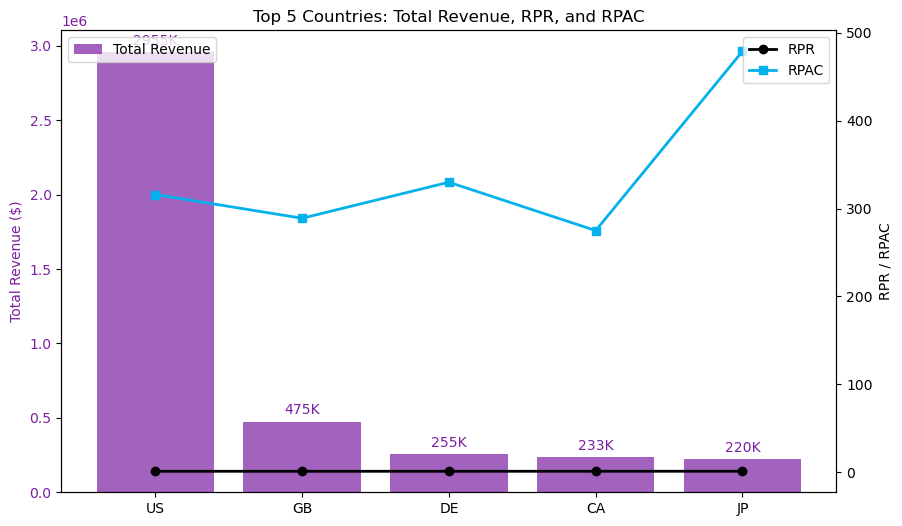

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Top 5 country data
data = {
    'Country': ['US', 'GB', 'DE', 'CA', 'JP'],
    'Total_Revenue': [2955813, 475395, 255805, 233775, 220628],
    'RPR': [1.0935, 1.0912, 1.0917, 1.1129, 1.1215],
    'RPAC': [316, 289, 330, 275, 479]
}

df = pd.DataFrame(data)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Total Revenue
bars = ax1.bar(df['Country'], df['Total_Revenue'], color='#7B1FA2', alpha=0.7, label='Total Revenue')
ax1.set_ylabel('Total Revenue ($)', color='#7B1FA2')
ax1.tick_params(axis='y', labelcolor='#7B1FA2')

# Annotate bars with revenue values (in K)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50000, f'{int(height/1000)}K', ha='center', color='#7B1FA2')

# Create second y-axis for RPR and RPAC
ax2 = ax1.twinx()
ax2.plot(df['Country'], df['RPR'], color='black', marker='o', label='RPR', linewidth=2)
ax2.plot(df['Country'], df['RPAC'], color='#03b2ed', marker='s', label='RPAC', linewidth=2)
ax2.set_ylabel('RPR / RPAC', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('Top 5 Countries: Total Revenue, RPR, and RPAC')

plt.show()


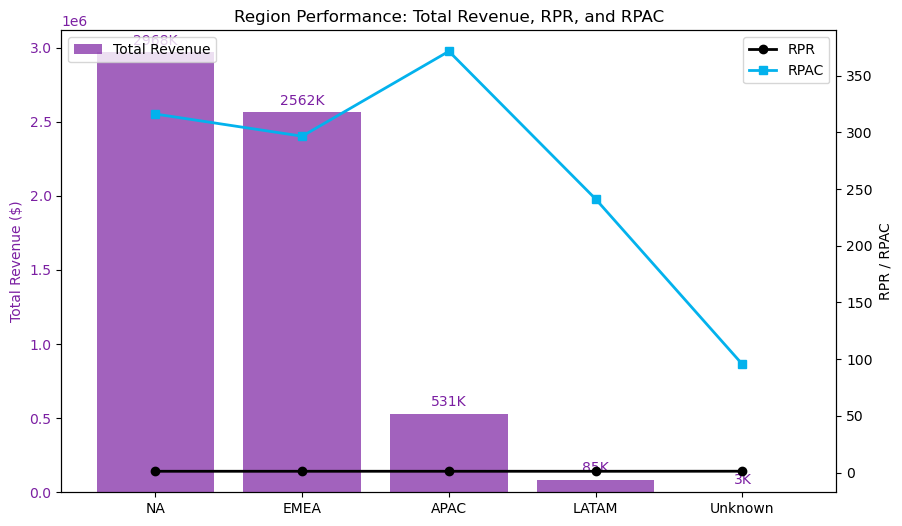

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Region data
data = {
    'Region': ['NA', 'EMEA', 'APAC', 'LATAM', 'Unknown'],
    'Total_Revenue': [2968096.26, 2562575.68, 531226.11, 85841.40, 3527.04],
    'RPR': [1.0934, 1.0942, 1.0979, 1.0843, 1.1351],
    'RPAC': [316.16, 296.59, 371.49, 241.13, 95.33]
}

df = pd.DataFrame(data)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Total Revenue
bars = ax1.bar(df['Region'], df['Total_Revenue'], color='#7B1FA2', alpha=0.7, label='Total Revenue')
ax1.set_ylabel('Total Revenue ($)', color='#7B1FA2')
ax1.tick_params(axis='y', labelcolor='#7B1FA2')

# Annotate bars with revenue values (in K)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50000, f'{int(height/1000)}K', ha='center', color='#7B1FA2')

# Create second y-axis for RPR and RPAC
ax2 = ax1.twinx()
ax2.plot(df['Region'], df['RPR'], color='black', marker='o', label='RPR', linewidth=2)
ax2.plot(df['Region'], df['RPAC'], color='#03b2ed', marker='s', label='RPAC', linewidth=2)
ax2.set_ylabel('RPR / RPAC', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('Region Performance: Total Revenue, RPR, and RPAC')

plt.show()


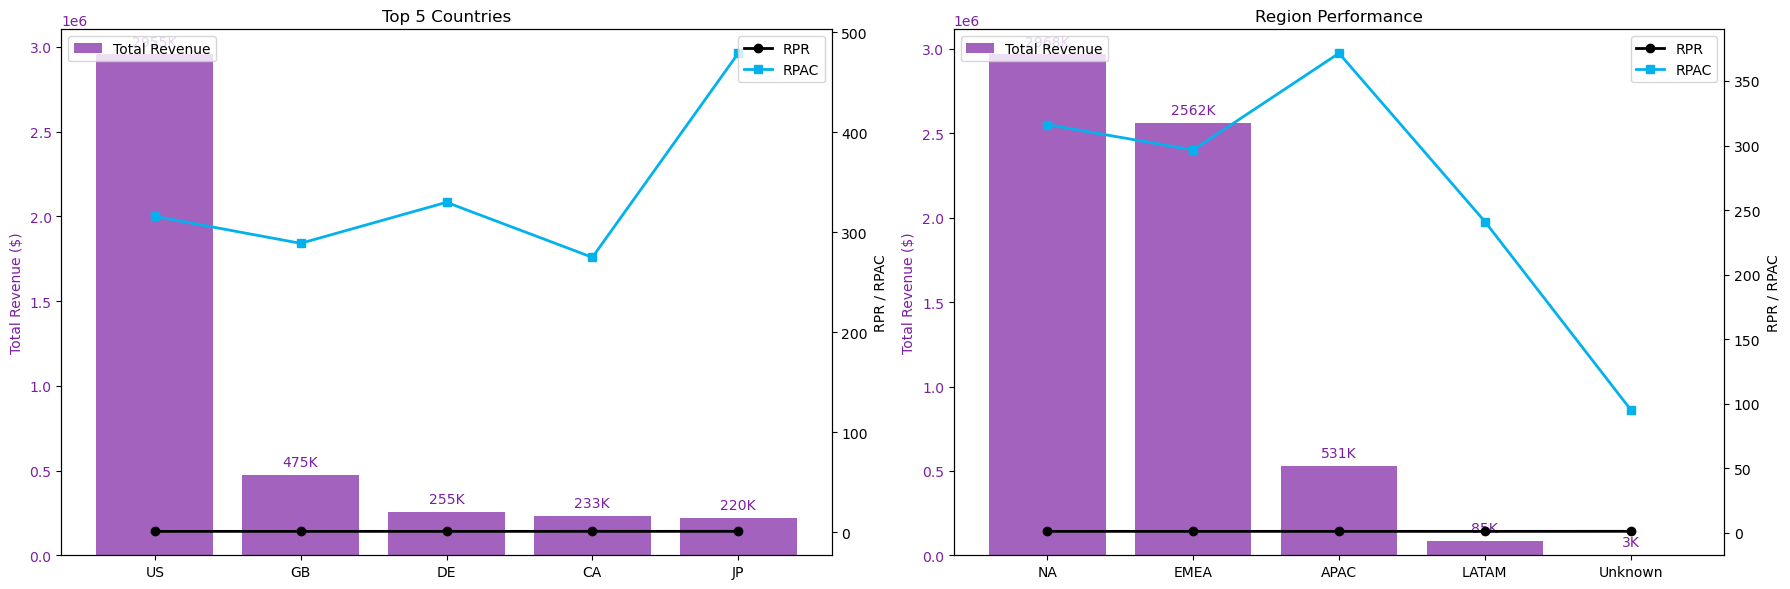

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Country Data ---
country_data = {
    'Country': ['US', 'GB', 'DE', 'CA', 'JP'],
    'Total_Revenue': [2955813, 475395, 255805, 233775, 220628],
    'RPR': [1.0935, 1.0912, 1.0917, 1.1129, 1.1215],
    'RPAC': [316, 289, 330, 275, 479]
}
df_country = pd.DataFrame(country_data)

# --- Region Data ---
region_data = {
    'Region': ['NA', 'EMEA', 'APAC', 'LATAM', 'Unknown'],
    'Total_Revenue': [2968096.26, 2562575.68, 531226.11, 85841.40, 3527.04],
    'RPR': [1.0934, 1.0942, 1.0979, 1.0843, 1.1351],
    'RPAC': [316.16, 296.59, 371.49, 241.13, 95.33]
}
df_region = pd.DataFrame(region_data)

# --- Create Subplots ---
fig, axes = plt.subplots(ncols=2, figsize=(18,6), sharey=False)

# ---- Left: Country Chart ----
ax1 = axes[0]
bars1 = ax1.bar(df_country['Country'], df_country['Total_Revenue'], color='#7B1FA2', alpha=0.7, label='Total Revenue')
ax1.set_ylabel('Total Revenue ($)', color='#7B1FA2')
ax1.tick_params(axis='y', labelcolor='#7B1FA2')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50000, f'{int(height/1000)}K', ha='center', color='#7B1FA2')

ax1_twin = ax1.twinx()
ax1_twin.plot(df_country['Country'], df_country['RPR'], color='black', marker='o', label='RPR', linewidth=2)
ax1_twin.plot(df_country['Country'], df_country['RPAC'], color='#03b2ed', marker='s', label='RPAC', linewidth=2)
ax1_twin.set_ylabel('RPR / RPAC', color='black')
ax1_twin.tick_params(axis='y', labelcolor='black')

ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.set_title('Top 5 Countries')

# ---- Right: Region Chart ----
ax2 = axes[1]
bars2 = ax2.bar(df_region['Region'], df_region['Total_Revenue'], color='#7B1FA2', alpha=0.7, label='Total Revenue')
ax2.set_ylabel('Total Revenue ($)', color='#7B1FA2')
ax2.tick_params(axis='y', labelcolor='#7B1FA2')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 50000, f'{int(height/1000)}K', ha='center', color='#7B1FA2')

ax2_twin = ax2.twinx()
ax2_twin.plot(df_region['Region'], df_region['RPR'], color='black', marker='o', label='RPR', linewidth=2)
ax2_twin.plot(df_region['Region'], df_region['RPAC'], color='#03b2ed', marker='s', label='RPAC', linewidth=2)
ax2_twin.set_ylabel('RPR / RPAC', color='black')
ax2_twin.tick_params(axis='y', labelcolor='black')

ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')
ax2.set_title('Region Performance')

# Adjust layout
plt.tight_layout()
plt.show()


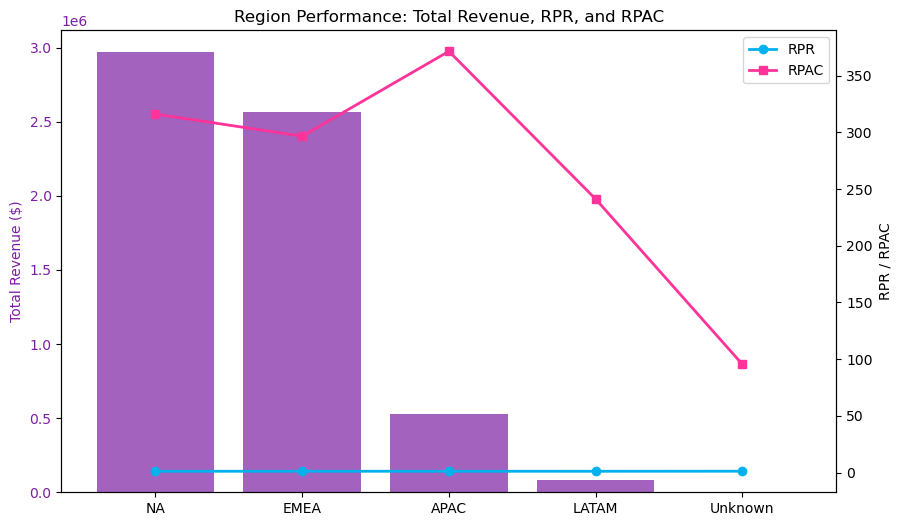

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Region data
data = {
    'Region': ['NA', 'EMEA', 'APAC', 'LATAM', 'Unknown'],
    'Total_Revenue': [2968096.26, 2562575.68, 531226.11, 85841.40, 3527.04],
    'RPR': [1.0934, 1.0942, 1.0979, 1.0843, 1.1351],
    'RPAC': [316.16, 296.59, 371.49, 241.13, 95.33]
}

df = pd.DataFrame(data)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Total Revenue (NO LABELS & NO LEGEND)
bars = ax1.bar(df['Region'], df['Total_Revenue'], color='#7B1FA2', alpha=0.7)

ax1.set_ylabel('Total Revenue ($)', color='#7B1FA2')
ax1.tick_params(axis='y', labelcolor='#7B1FA2')

# REMOVE revenue labels
# (NO annotation here intentionally)

# Second axis for RPR (blue) and RPAC (pink)
ax2 = ax1.twinx()
ax2.plot(df['Region'], df['RPR'], color='#03b2ed', marker='o', label='RPR', linewidth=2)   # Blue
ax2.plot(df['Region'], df['RPAC'], color='#FF3399', marker='s', label='RPAC', linewidth=2) # Pink

ax2.set_ylabel('RPR / RPAC', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Legends (ONLY for RPR & RPAC)
ax2.legend(loc='upper right')

# Title
plt.title('Region Performance: Total Revenue, RPR, and RPAC')

plt.show()


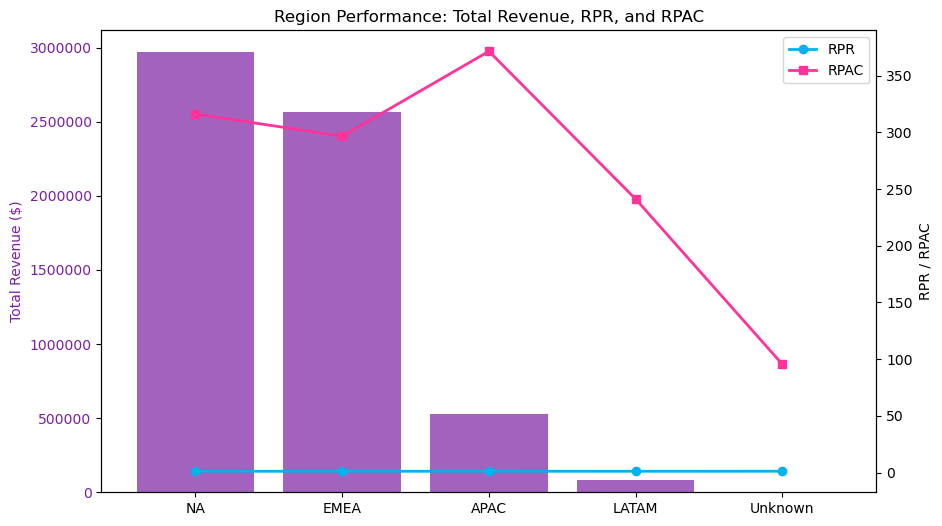

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Region data
data = {
    'Region': ['NA', 'EMEA', 'APAC', 'LATAM', 'Unknown'],
    'Total_Revenue': [2968096.26, 2562575.68, 531226.11, 85841.40, 3527.04],
    'RPR': [1.0934, 1.0942, 1.0979, 1.0843, 1.1351],
    'RPAC': [316.16, 296.59, 371.49, 241.13, 95.33]
}

df = pd.DataFrame(data)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Disable scientific notation on revenue axis
ax1.ticklabel_format(style='plain', axis='y')

# Bar chart for Total Revenue
bars = ax1.bar(df['Region'], df['Total_Revenue'], color='#7B1FA2', alpha=0.7)

ax1.set_ylabel('Total Revenue ($)', color='#7B1FA2')
ax1.tick_params(axis='y', labelcolor='#7B1FA2')

# Second axis for RPR (blue) and RPAC (pink)
ax2 = ax1.twinx()
ax2.plot(df['Region'], df['RPR'], color='#03b2ed', marker='o', label='RPR', linewidth=2)
ax2.plot(df['Region'], df['RPAC'], color='#FF3399', marker='s', label='RPAC', linewidth=2)

ax2.set_ylabel('RPR / RPAC', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Only RPR & RPAC legend
ax2.legend(loc='upper right')

# Title
plt.title('Region Performance: Total Revenue, RPR, and RPAC')

plt.show()


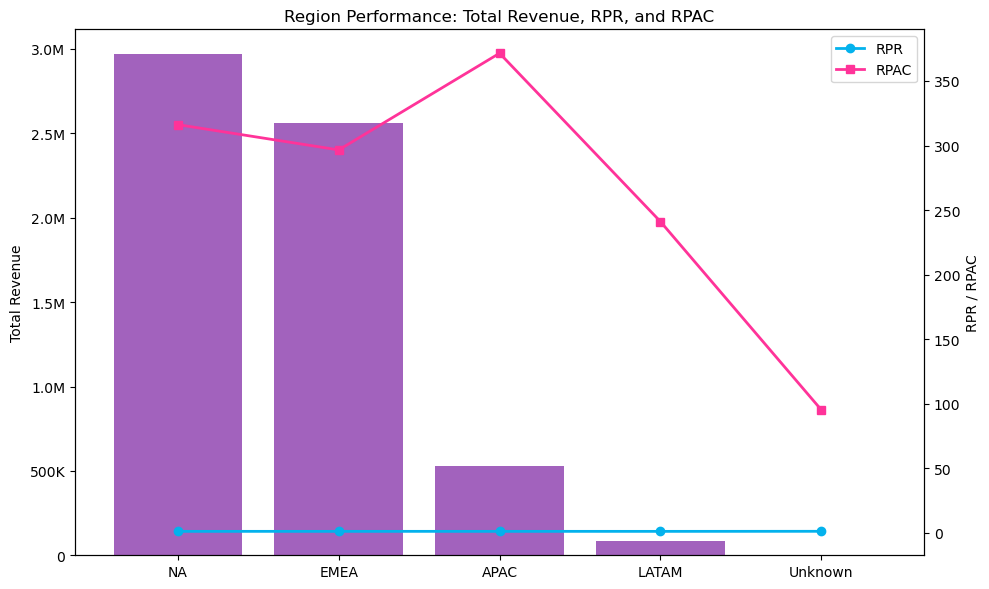

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Region data
data = {
    'Region': ['NA', 'EMEA', 'APAC', 'LATAM', 'Unknown'],
    'Total_Revenue': [2968096.26, 2562575.68, 531226.11, 85841.40, 3527.04],
    'RPR': [1.0934, 1.0942, 1.0979, 1.0843, 1.1351],
    'RPAC': [316.16, 296.59, 371.49, 241.13, 95.33]
}

df = pd.DataFrame(data)

# Formatter function for K / M style
def format_km(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return f'{x:.0f}'

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Revenue bar chart
bars = ax1.bar(df['Region'], df['Total_Revenue'], color='#7B1FA2', alpha=0.7)

# Apply custom K/M formatting to left Y-axis
ax1.yaxis.set_major_formatter(FuncFormatter(format_km))

ax1.set_ylabel('Total Revenue', color="#000000")
ax1.tick_params(axis='y', labelcolor="#000000")

# RPR (blue) & RPAC (pink)
ax2 = ax1.twinx()
ax2.plot(df['Region'], df['RPR'], color='#03b2ed', marker='o', label='RPR', linewidth=2)
ax2.plot(df['Region'], df['RPAC'], color='#FF3399', marker='s', label='RPAC', linewidth=2)

ax2.set_ylabel('RPR / RPAC', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Only RPR/RPAC legend
ax2.legend(loc='upper right')

plt.title('Region Performance: Total Revenue, RPR, and RPAC')
plt.tight_layout()
plt.show()


In [2]:
# Ensure purchase_year is integer
df['purchase_year'] = df['purchase_year'].astype(int)

# Filter for years 2019 and 2020
df_filtered = df[df['purchase_year'].isin([2019, 2020])]

# Group by region + year and sum revenue
regional_revenue = (
    df_filtered
    .groupby(['region', 'purchase_year'])['revenue']
    .sum()
    .reset_index()
    .sort_values(['region', 'purchase_year'])
)

regional_revenue


,region,purchase_year,revenue
0,APAC,2019,108081.09
1,APAC,2020,371472.41
2,EMEA,2019,641358.29
3,EMEA,2020,1671175.85
4,LATAM,2019,14698.59
5,LATAM,2020,63061.31
6,NA,2019,776070.26
7,NA,2020,1963948.24
8,unknown,2019,713.31
9,unknown,2020,2459.45


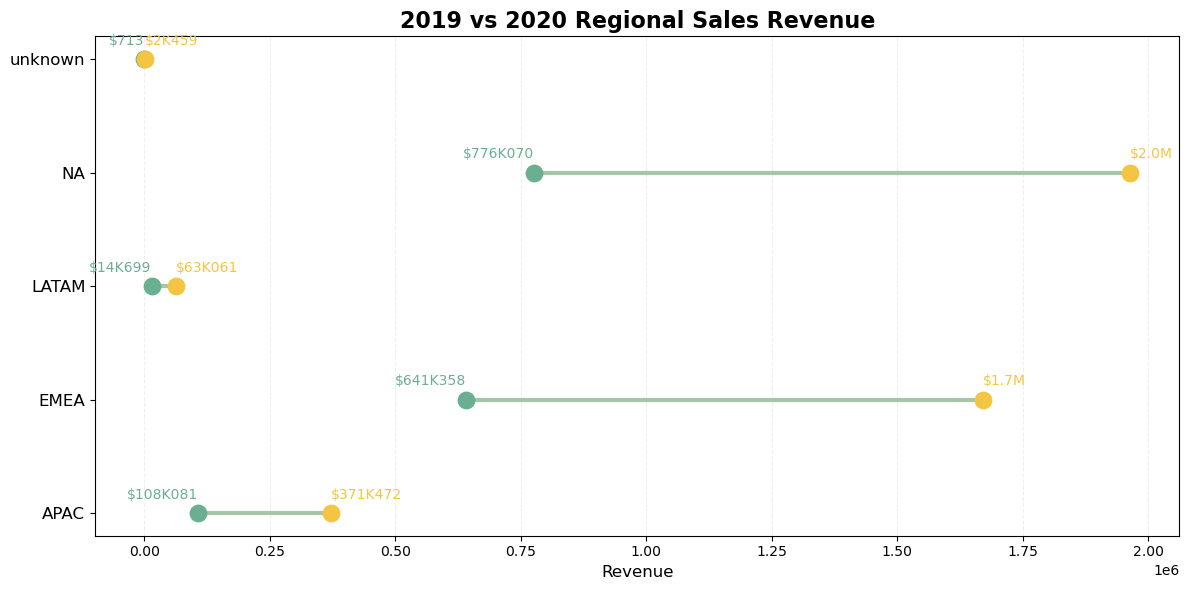

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------
# 1. PREP DATA (dynamic)
# -------------------------
df['purchase_year'] = df['purchase_year'].astype(int)

df_filtered = df[df['purchase_year'].isin([2019, 2020])]

regional_revenue = (
    df_filtered
    .groupby(['region', 'purchase_year'])['revenue']
    .sum()
    .reset_index()
)

# Pivot: rows = region, cols = years
pivot = regional_revenue.pivot(index="region", columns="purchase_year", values="revenue")

# Ensure ordering is consistent
pivot = pivot.sort_index()


# -------------------------
# 2. PLOT DUMBBELL CHART
# -------------------------

plt.figure(figsize=(12, 6))

# Colors (matching your screenshot)
color_2019 = "#6BAF92"   # green
color_2020 = "#F4C542"   # yellow
line_color = "#A7C6A8"   # light green connectors

regions = pivot.index.tolist()
y_positions = range(len(regions))

for i, region in enumerate(regions):
    val_2019 = pivot.loc[region, 2019]
    val_2020 = pivot.loc[region, 2020]

    # Connecting line
    plt.plot([val_2019, val_2020], [i, i],
             color=line_color, linewidth=3)

    # Dot 2019
    plt.scatter(val_2019, i, color=color_2019, s=140, zorder=3)
    plt.text(val_2019, i + 0.1,
             f"${val_2019:,.0f}".replace(",","K") if val_2019 < 1_000_000 else f"${val_2019/1_000_000:.1f}M",
             ha='right', va='bottom', fontsize=10, color=color_2019)

    # Dot 2020
    plt.scatter(val_2020, i, color=color_2020, s=140, zorder=3)
    plt.text(val_2020, i + 0.1,
             f"${val_2020:,.0f}".replace(",","K") if val_2020 < 1_000_000 else f"${val_2020/1_000_000:.1f}M",
             ha='left', va='bottom', fontsize=10, color=color_2020)


# -------------------------
# 3. BEAUTIFY PLOT
# -------------------------
plt.yticks(y_positions, regions, fontsize=12)
plt.xlabel("Revenue", fontsize=12)
plt.title("2019 vs 2020 Regional Sales Revenue", fontsize=16, weight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


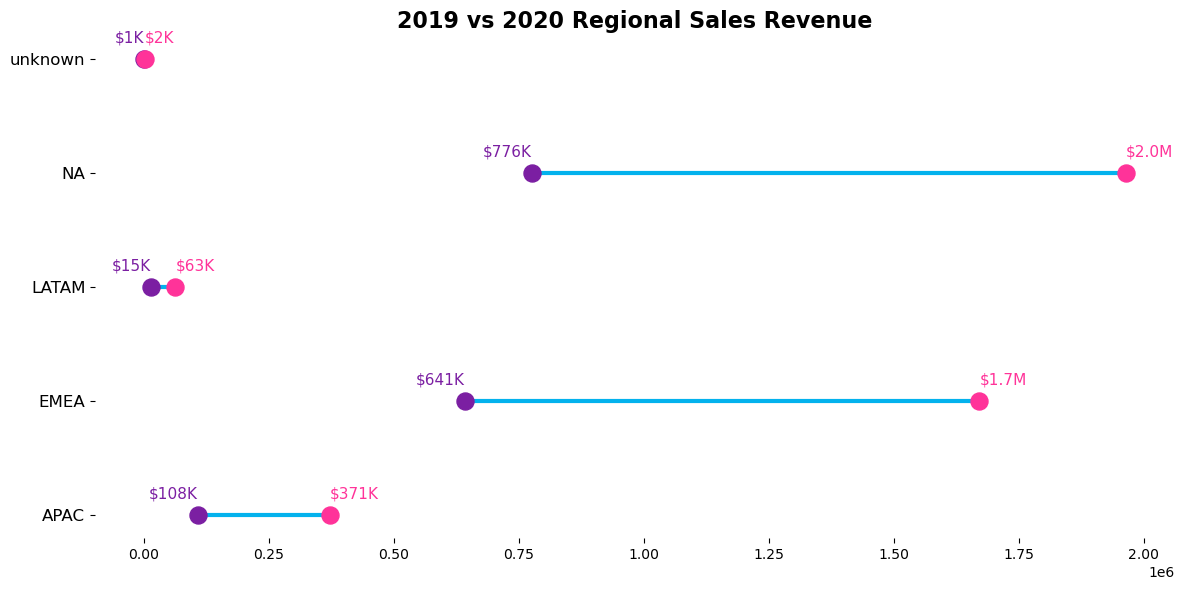

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------
# 1. PREP DATA (dynamic)
# -------------------------
df['purchase_year'] = df['purchase_year'].astype(int)

df_filtered = df[df['purchase_year'].isin([2019, 2020])]

regional_revenue = (
    df_filtered
    .groupby(['region', 'purchase_year'])['revenue']
    .sum()
    .reset_index()
)

pivot = regional_revenue.pivot(
    index="region",
    columns="purchase_year",
    values="revenue"
).sort_index()

# -------------------------
# 2. COLOURS (your theme)
# -------------------------
color_2019 = "#7B1FA2"   # Purple
color_2020 = "#FF3399"   # Pink
line_color  = "#03b2ed"  # Blue (connector)


# -------------------------
# 3. PLOT DUMBBELL CHART
# -------------------------
plt.figure(figsize=(12, 6))
regions = pivot.index.tolist()
y_positions = range(len(regions))

for i, region in enumerate(regions):

    v2019 = pivot.loc[region, 2019]
    v2020 = pivot.loc[region, 2020]

    # Connecting line
    plt.plot([v2019, v2020], [i, i],
             color=line_color, linewidth=3)

    # 2019 Dot
    plt.scatter(v2019, i, s=150, color=color_2019, zorder=3)
    plt.text(v2019, i + 0.12,
             f"${v2019/1_000_000:.1f}M" if v2019 >= 1_000_000 else f"${v2019/1000:.0f}K",
             ha='right', va='bottom', fontsize=11, color=color_2019)

    # 2020 Dot
    plt.scatter(v2020, i, s=150, color=color_2020, zorder=3)
    plt.text(v2020, i + 0.12,
             f"${v2020/1_000_000:.1f}M" if v2020 >= 1_000_000 else f"${v2020/1000:.0f}K",
             ha='left', va='bottom', fontsize=11, color=color_2020)


# -------------------------
# 4. CLEAN STYLE (no grid, no outlines)
# -------------------------

plt.yticks(y_positions, regions, fontsize=12)
plt.xlabel("")
plt.title("2019 vs 2020 Regional Sales Revenue", fontsize=16, weight='bold')

# Remove gridlines
plt.grid(False)

# Remove all chart borders / spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


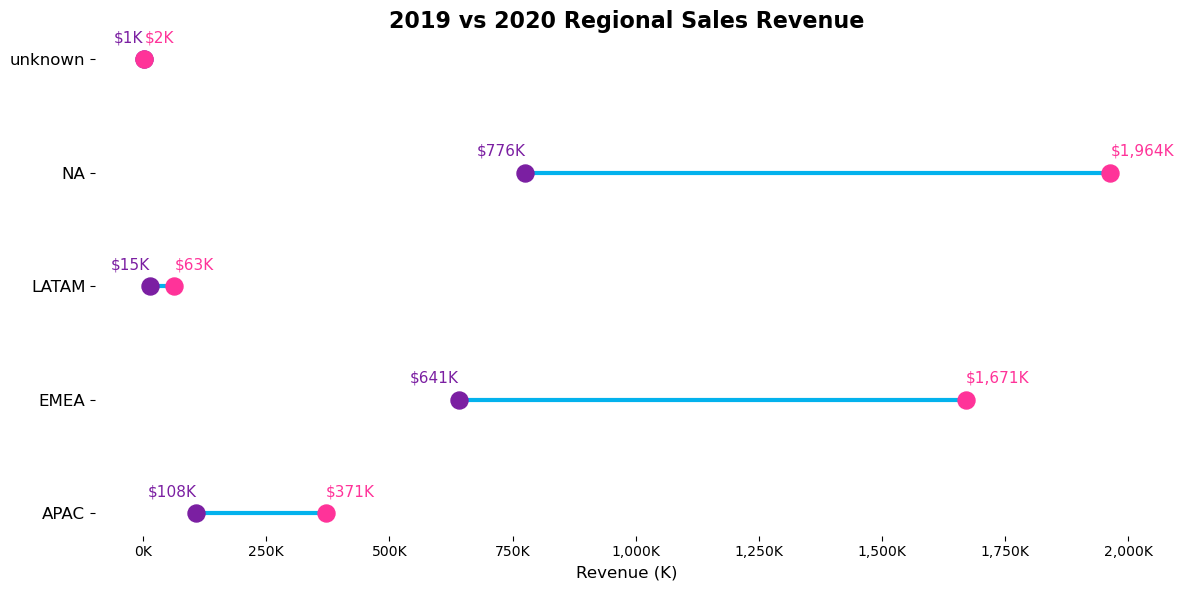

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# -------------------------
# 1. PREP DATA (dynamic)
# -------------------------
df['purchase_year'] = df['purchase_year'].astype(int)

df_filtered = df[df['purchase_year'].isin([2019, 2020])]

regional_revenue = (
    df_filtered
    .groupby(['region', 'purchase_year'])['revenue']
    .sum()
    .reset_index()
)

pivot = regional_revenue.pivot(
    index="region",
    columns="purchase_year",
    values="revenue"
).sort_index()

# -------------------------
# 2. COLORS (your theme)
# -------------------------
color_2019 = "#7B1FA2"   # Purple
color_2020 = "#FF3399"   # Pink
line_color  = "#03b2ed"  # Blue connector

# -------------------------
# 3. PLOT
# -------------------------

plt.figure(figsize=(12, 6))
regions = pivot.index.tolist()
y_positions = range(len(regions))

def format_k(value):
    """Convert revenue to 'X,XXXK' format."""
    return f"{value/1000:,.0f}K"

for i, region in enumerate(regions):

    v2019 = pivot.loc[region, 2019]
    v2020 = pivot.loc[region, 2020]

    # Connector line
    plt.plot([v2019, v2020], [i, i],
             color=line_color, linewidth=3)

    # 2019 dot
    plt.scatter(v2019, i, s=150, color=color_2019, zorder=3)
    plt.text(v2019, i + 0.12,
             "$" + format_k(v2019),
             ha='right', va='bottom', fontsize=11, color=color_2019)

    # 2020 dot
    plt.scatter(v2020, i, s=150, color=color_2020, zorder=3)
    plt.text(v2020, i + 0.12,
             "$" + format_k(v2020),
             ha='left', va='bottom', fontsize=11, color=color_2020)

# -------------------------
# 4. CLEAN STYLE
# -------------------------

plt.yticks(y_positions, regions, fontsize=12)
plt.xlabel("Revenue (K)", fontsize=12)
plt.title("2019 vs 2020 Regional Sales Revenue", fontsize=16, weight='bold')

# Remove gridlines
plt.grid(False)

# Remove borders / spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# X-axis tick formatter → K format
plt.gca().xaxis.set_major_formatter(lambda x, pos: f"{x/1000:,.0f}K")

plt.tight_layout()
plt.show()


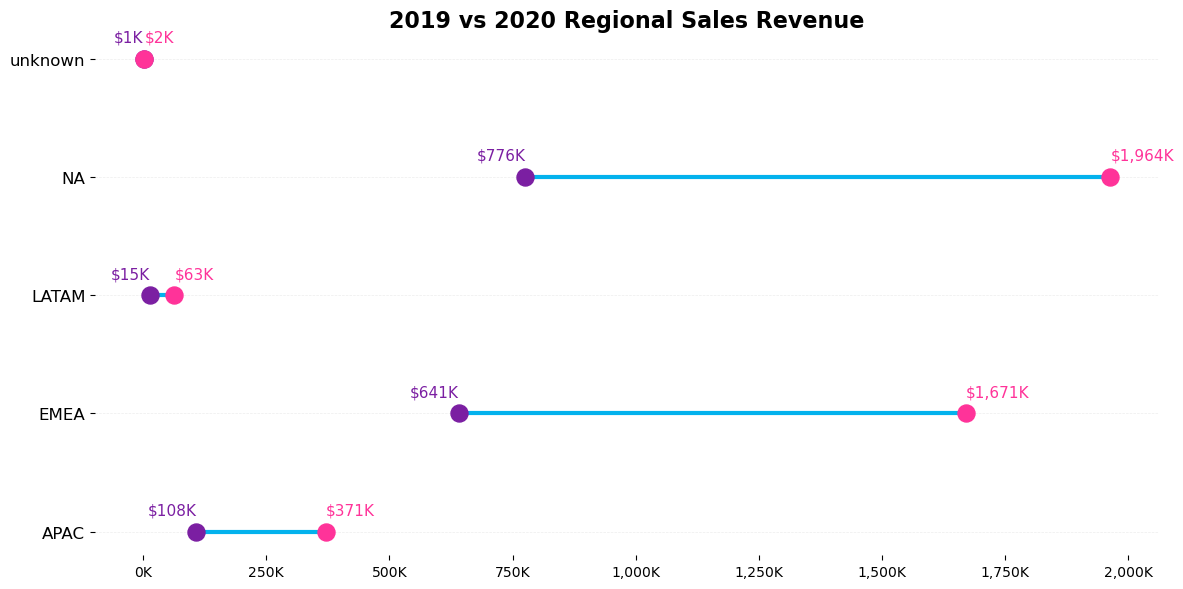

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# -------------------------
# 1. PREP DATA (dynamic)
# -------------------------
df['purchase_year'] = df['purchase_year'].astype(int)

df_filtered = df[df['purchase_year'].isin([2019, 2020])]

regional_revenue = (
    df_filtered
    .groupby(['region', 'purchase_year'])['revenue']
    .sum()
    .reset_index()
)

pivot = regional_revenue.pivot(
    index="region",
    columns="purchase_year",
    values="revenue"
).sort_index()

# -------------------------
# 2. COLORS (your theme)
# -------------------------
color_2019 = "#7B1FA2"   # Purple
color_2020 = "#FF3399"   # Pink
line_color  = "#03b2ed"  # Blue connector

# -------------------------
# 3. FUNCTION TO FORMAT K
# -------------------------
def format_k(value):
    return f"{value/1000:,.0f}K"

# -------------------------
# 4. PLOT
# -------------------------
plt.figure(figsize=(12, 6))
regions = pivot.index.tolist()
y_positions = range(len(regions))

for i, region in enumerate(regions):

    v2019 = pivot.loc[region, 2019]
    v2020 = pivot.loc[region, 2020]

    # Connector line
    plt.plot([v2019, v2020], [i, i],
             color=line_color, linewidth=3)

    # 2019 dot
    plt.scatter(v2019, i, s=150, color=color_2019, zorder=3)
    plt.text(v2019, i + 0.12,
             "$" + format_k(v2019),
             ha='right', va='bottom', fontsize=11, color=color_2019)

    # 2020 dot
    plt.scatter(v2020, i, s=150, color=color_2020, zorder=3)
    plt.text(v2020, i + 0.12,
             "$" + format_k(v2020),
             ha='left', va='bottom', fontsize=11, color=color_2020)

# -------------------------
# 5. STYLE + GRID + NO OUTLINE
# -------------------------

plt.yticks(y_positions, regions, fontsize=12)
plt.title("2019 vs 2020 Regional Sales Revenue", fontsize=16, weight='bold')

# Very light horizontal gridlines only
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.5, alpha=0.4)

# Remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# X-axis tick formatter → K format
plt.gca().xaxis.set_major_formatter(lambda x, pos: f"{x/1000:,.0f}K")

plt.tight_layout()
plt.show()


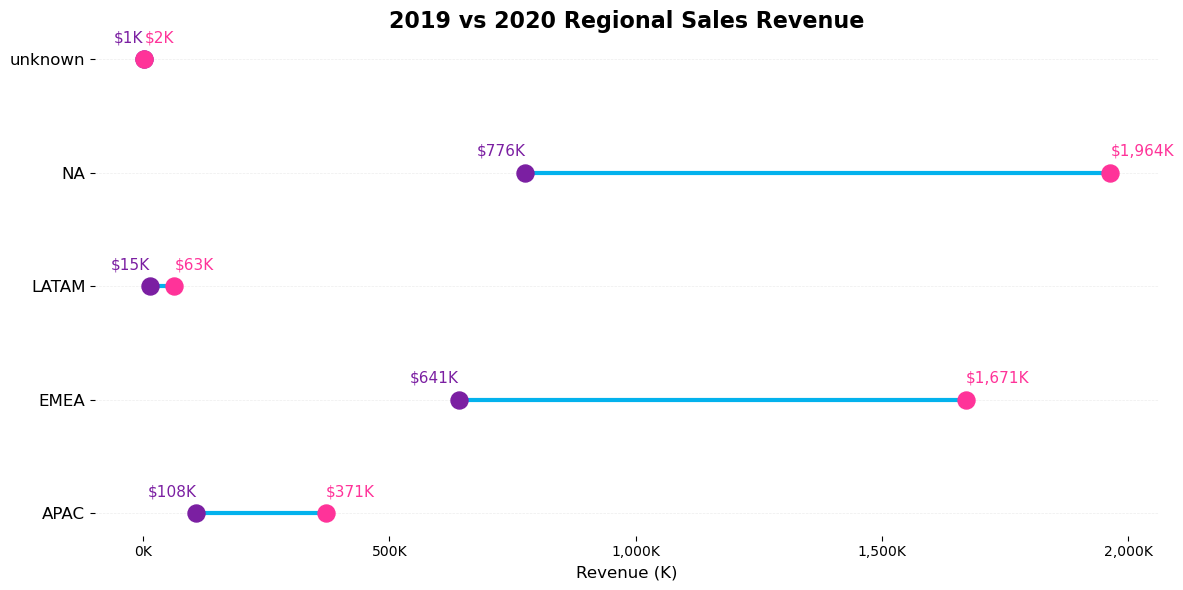

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# -------------------------
# 1. PREP DATA (dynamic)
# -------------------------
df['purchase_year'] = df['purchase_year'].astype(int)

df_filtered = df[df['purchase_year'].isin([2019, 2020])]

regional_revenue = (
    df_filtered
    .groupby(['region', 'purchase_year'])['revenue']
    .sum()
    .reset_index()
)

pivot = regional_revenue.pivot(
    index="region",
    columns="purchase_year",
    values="revenue"
).sort_index()

# -------------------------
# 2. COLORS (your theme)
# -------------------------
color_2019 = "#7B1FA2"   # Purple
color_2020 = "#FF3399"   # Pink
line_color  = "#03b2ed"  # Blue connector

# -------------------------
# 3. FORMATTER
# -------------------------
def format_k(value):
    return f"{value/1000:,.0f}K"

# -------------------------
# 4. PLOT
# -------------------------
plt.figure(figsize=(12, 6))
regions = pivot.index.tolist()
y_positions = range(len(regions))

for i, region in enumerate(regions):

    v2019 = pivot.loc[region, 2019]
    v2020 = pivot.loc[region, 2020]

    # Connector line
    plt.plot([v2019, v2020], [i, i],
             color=line_color, linewidth=3)

    # 2019 dot
    plt.scatter(v2019, i, s=150, color=color_2019, zorder=3)
    plt.text(v2019, i + 0.12,
             "$" + format_k(v2019),
             ha='right', va='bottom', fontsize=11, color=color_2019)

    # 2020 dot
    plt.scatter(v2020, i, s=150, color=color_2020, zorder=3)
    plt.text(v2020, i + 0.12,
             "$" + format_k(v2020),
             ha='left', va='bottom', fontsize=11, color=color_2020)

# -------------------------
# 5. STYLE + GRID + NO OUTLINE
# -------------------------

plt.yticks(y_positions, regions, fontsize=12)
plt.xlabel("Revenue (K)", fontsize=12)
plt.title("2019 vs 2020 Regional Sales Revenue", fontsize=16, weight='bold')

# Very light horizontal gridlines only
plt.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.5, alpha=0.4)

# Remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# *** 500K bins instead of 250K ***
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500000))

# K-format for bins
plt.gca().xaxis.set_major_formatter(lambda x, pos: f"{x/1000:,.0f}K")

plt.tight_layout()
plt.show()
